# K-Means Clustering

K Means Clustering is part of the unsupervised learning algorithm. It has no target or label instead groups data based on their similarities. The algorithm explores the data, finds the relationship between features, and identifies the pattern

### Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo

In [4]:
import os
import pandas as pd
import plotly as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime
from sklearn.decomposition import PCA

### Importing Dataset

Importing the data of face book sellers

In [66]:
data = pd.read_csv('.././csv/live.csv')
df = pd.DataFrame(data)

In [6]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Basc insight into Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [8]:
df.isna().sum()
df.isnull().sum()
df.duplicated().sum()

51

### Removing Duplicates

As 51 rows are dedected as duplicates, droping the same

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.duplicated().sum()

0

### Dropping unwanted columns

The status IS and 4 unknown columns canbe dropped

In [69]:
df.drop(labels=['status_id','Column1','Column2','Column3','Column4'],axis=1,inplace=True)

### Statistical Description

     1. The magnitude of the feature scales varies therefore the data needs to be standardized
     2. Most of the reaction columns have 0 values
     3. Features do not seem to be normally distributed

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,6999.0,-1.299464e-16,1.000071,-1.810470,-0.751070,-0.751070,1.367729,1.367729
num_reactions,6999.0,0.000000e+00,1.000071,-0.496843,-0.459303,-0.368765,-0.019862,9.903989
num_comments,6999.0,0.000000e+00,1.000071,-0.252669,-0.252669,-0.248188,-0.228024,23.260817
num_shares,6999.0,-4.872989e-17,1.000071,-0.304903,-0.304903,-0.304903,-0.274608,25.627130
num_loves,6999.0,-1.624330e-17,1.000071,-0.317962,-0.317962,-0.317962,-0.243156,16.064442
num_wows,6999.0,-1.624330e-17,1.000071,-0.143599,-0.143599,-0.143599,-0.143599,31.719130
num_hahas,6999.0,-3.248659e-17,1.000071,-0.175780,-0.175780,-0.175780,-0.175780,39.364558
num_sads,6999.0,-8.121649e-18,1.000071,-0.157059,-0.157059,-0.157059,-0.157059,34.279148
num_angrys,6999.0,-1.624330e-17,1.000071,-0.159990,-0.159990,-0.159990,-0.159990,44.863283
days_published_tilldate,6999.0,-6.497319e-17,1.000071,-0.827843,-0.685042,-0.527816,0.365054,2.286382


In [52]:
df.describe(include=['object']).T

,count,unique,top,freq
status_type,6999,4,photo,4244
status_published,6999,6913,12/9/2017 7:00,2


### Visualize the distribution of data using Histogram

array([[<Axes: title={'center': 'num_reactions'}>,
        <Axes: title={'center': 'num_comments'}>,
        <Axes: title={'center': 'num_shares'}>],
       [<Axes: title={'center': 'num_likes'}>,
        <Axes: title={'center': 'num_loves'}>,
        <Axes: title={'center': 'num_wows'}>],
       [<Axes: title={'center': 'num_hahas'}>,
        <Axes: title={'center': 'num_sads'}>,
        <Axes: title={'center': 'num_angrys'}>]], dtype=object)

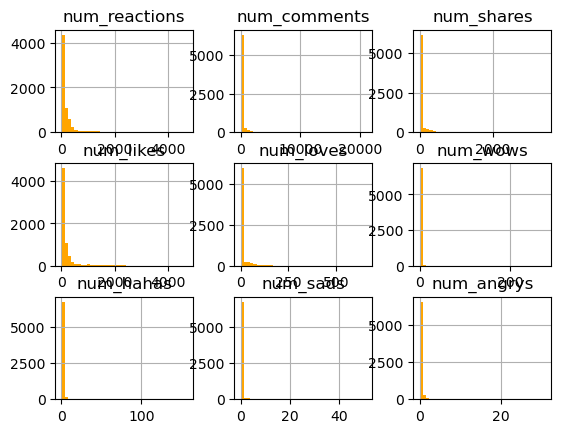

In [53]:
df.hist(bins='rice',color ='orange') 

### Pair plot to check data pattern

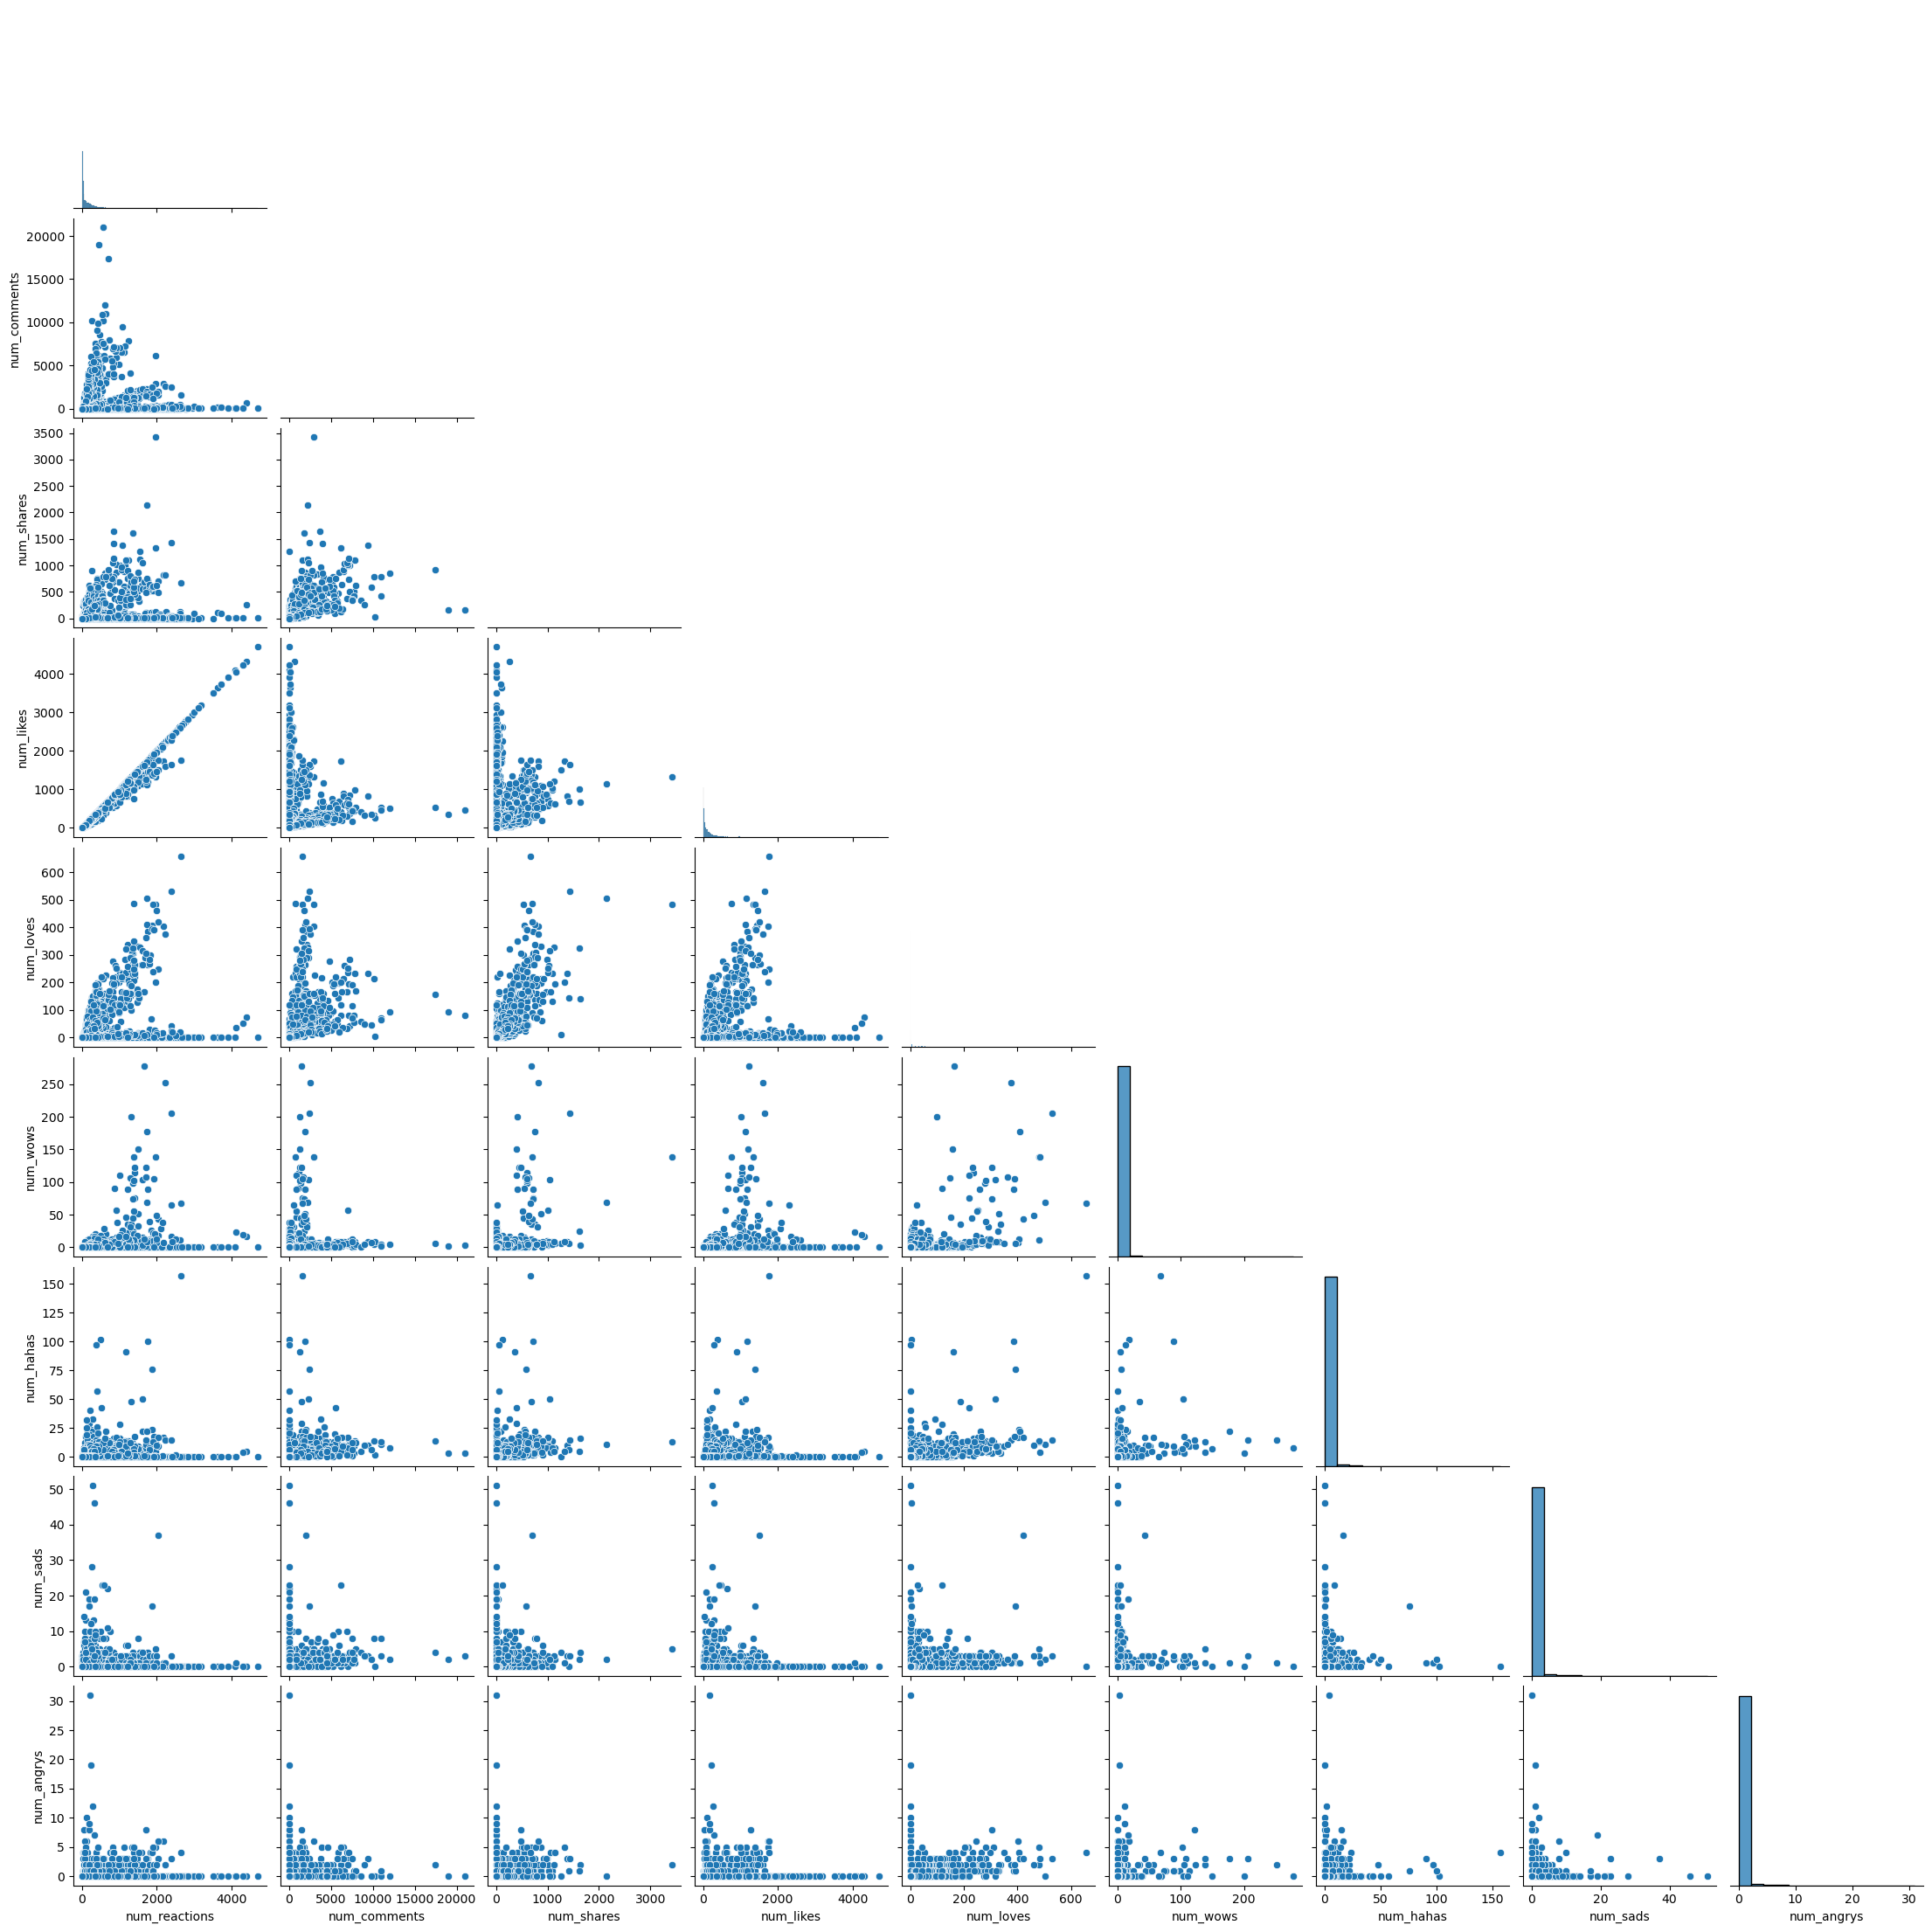

In [14]:
sns.pairplot(df,corner=True)

### Multicollinearity exbhited between num_reaction & num_likes

Therefor one the column can be dropped

In [70]:
df.drop(labels=['num_likes'],axis=1,inplace=True)

### Label Encoding Object Data Types

In [71]:
lbl_en = LabelEncoder()
df['status_type'] = lbl_en.fit_transform(df['status_type'])  

### Feature Extraction 

Obtaining the count of days from the day the status was published till date

In [72]:
df['days_published_tilldate'] = (pd.Timestamp.now().normalize() - pd.to_datetime(df['status_published'], errors='coerce'))

In [73]:
df['days_published_tilldate'] = df['days_published_tilldate'].astype(str).map(lambda x: x[:5])

### Dropping the date column after extracting the days

In [74]:
df.drop(labels=['status_published'],axis=1,inplace=True)

### Scaling the Data using standard scaler

In [75]:
scaler_cols  = ['status_type',  'num_reactions', 'num_comments',
       'num_shares', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'days_published_tilldate']
scaler = StandardScaler()
df[scaler_cols] = scaler.fit_transform(df[scaler_cols])

In [76]:
df.head(5)

,status_type,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,days_published_tilldate
0,1.367729,0.671318,0.320886,1.679382,1.976073,0.200243,0.076069,0.518160,-0.15999,-0.752836
1,-0.751070,-0.165606,-0.252669,-0.304903,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,-0.751394
2,1.367729,0.004428,0.011704,0.126793,0.205677,-0.028985,0.076069,-0.157059,-0.15999,-0.751394
3,-0.751070,-0.251728,-0.252669,-0.304903,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,-0.751394
4,-0.751070,-0.026487,-0.252669,-0.304903,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999,-0.747067


### Preparing data for model

The values in form of 2d array

In [24]:
# Get values of data
df_reshaped = df.iloc[:,:].values
df_reshaped.shape

(6999, 10)

In [81]:
df_reshaped.ndim

2

### Find optimum  number of clusters

    1. K-means clustering clusters data on their similarities and finding the center of the cluster which are called Centroids.
    2. The goal of the algorithm is to minimize the distance between the centroid and the cluster data points.
    3. The less distance implies that the cluster is tightly packed.
    4. This distance is referred to as WCSS: within-cluster sum of squares in other words Inertia.
   
Therefore we use inertia to determine the optimal count of clusters

In [26]:
inertia = []
for i in range(1,31):
    kmeans_model = KMeans(n_clusters=i, init = 'k-means++',max_iter=300,tol=0.0001,random_state=42,algorithm='elkan')
    kmeans_model.fit(df_reshaped)
    inertia.append(kmeans_model.inertia_)

In [27]:
inertia

[69990.00000000003,
 62593.650697751626,
 47589.70536179039,
 48933.86788067562,
 37253.3763710318,
 33794.240530589,
 28808.15725467213,
 26797.349484284612,
 23249.006594016853,
 21669.386867326044,
 20714.99148006545,
 17586.561976989084,
 16915.83841634658,
 15865.47245250016,
 14691.412946307684,
 14209.887639866532,
 13428.928632397134,
 12832.663003804291,
 12644.810981470668,
 12387.24343534459,
 11474.417832850118,
 10891.35892934773,
 10561.619314054067,
 9989.458948520805,
 9839.935585677116,
 9528.481560725271,
 9237.9694809392,
 9028.40754195408,
 8472.081162364015,
 8380.432098649248]

### Visualizing the Elbow Chart

Plotting the inertia to see the rate of decrease in WCSS. The point when WCSS saturates is said to be the optimum number of clusters. As we can after 12 there is no considerable amount of fluctuation and the slope is smooth.

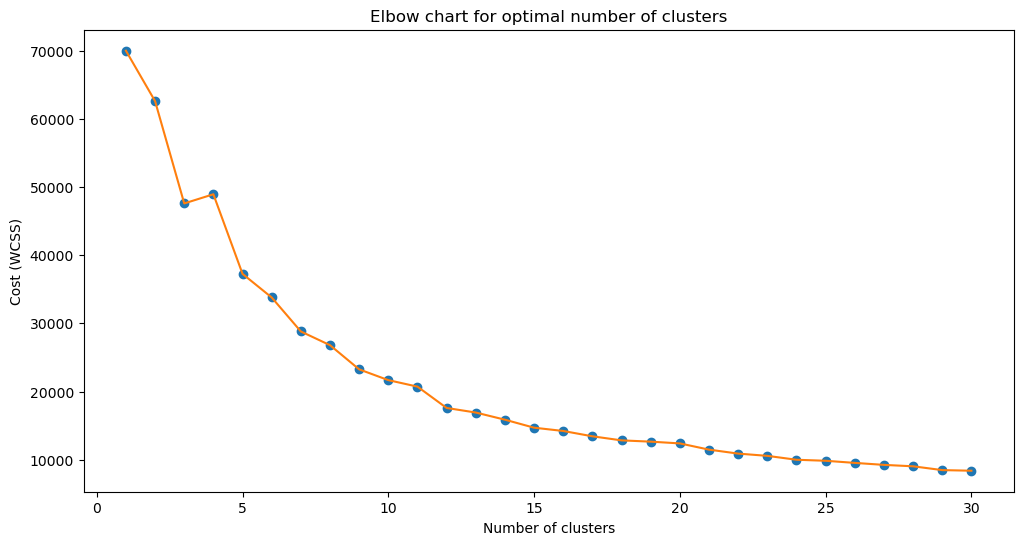

In [28]:
plt.subplots(figsize=(12,6))
plt.plot(np.arange(1,31), inertia, 'o') #align with no. of clusters
plt.plot(np.arange(1,31), inertia, '-')
plt.title('Elbow chart for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (WCSS)')
plt.show()

### Build the K-Means Model

In [82]:
kmeans_model = KMeans(n_clusters=12, init = 'k-means++',max_iter=300,tol=0.0001,random_state=42,algorithm='elkan')
kmeans_model.fit(df_reshaped)

KMeans(algorithm='elkan', n_clusters=12, random_state=42)

### Cluster Numbers

In [85]:
label = kmeans_model.labels_

### Centeroids

In [86]:
centroids = kmeans_model.cluster_centers_
df_centroids = pd.DataFrame(centroids,columns=df.columns)
df_centroids

,status_type,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,days_published_tilldate
0,-0.750035,-0.410709,-0.245819,-0.302312,-0.317962,-0.143599,-0.175780,-0.157059,-0.159990,2.033597
1,1.357623,0.088728,0.916358,1.414559,1.385518,0.022947,0.477266,0.220806,0.468059,-0.629261
2,1.367729,2.929104,1.547287,5.986131,7.149578,14.965534,2.715012,0.870449,2.429006,-0.764313
3,1.201006,-0.208382,-0.171056,-0.211574,-0.195936,-0.105195,-0.115231,-0.097458,-0.125410,-0.192081
4,-0.767776,-0.270435,-0.238530,-0.289062,-0.278069,-0.063738,-0.133171,-0.115579,-0.133749,-0.474039
5,1.344445,0.658457,6.644275,3.574615,2.273377,0.358940,2.032745,1.683100,1.068933,-0.562149
6,-0.751070,0.017678,-0.211781,-0.285969,-0.305494,0.200243,0.327919,0.180551,36.149101,-0.648981
7,-0.136501,3.468133,-0.188073,-0.221279,-0.261754,0.071698,-0.138907,-0.140272,-0.151966,0.612691
8,-0.044804,1.464078,0.496387,1.490042,3.231143,1.499203,1.251366,30.002756,1.292373,-0.491755
9,1.202198,2.197560,1.729951,4.071459,4.902449,1.210280,1.732765,1.003475,4.355953,-0.730907


### Visualizing the Centroids

<Axes: >

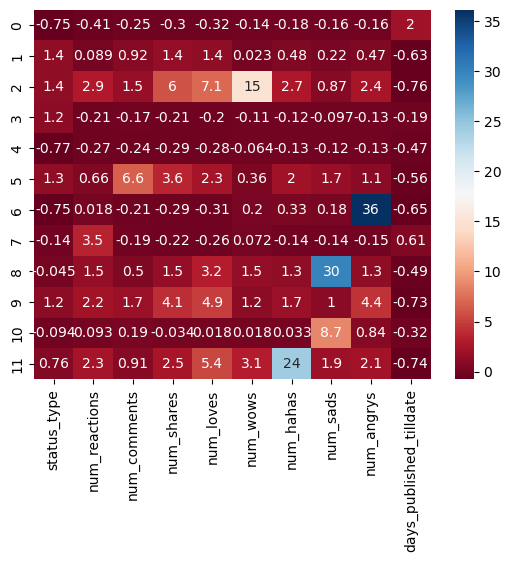

In [87]:
sns.heatmap(data=df_centroids,annot=True,cmap='RdBu')

### Plotting Centroids

To visualize centeroids clearly, PCA helps to reduce the dimension without losing the quality of data. Here we are using 2 compnents to visualie in x and y axis. The centroids are then plotted.

In [88]:
k_pca = PCA(n_components=2)
x_pca = k_pca.fit_transform(df_reshaped)

In [89]:
kmeans_model = KMeans(n_clusters=12, init = 'k-means++',max_iter=300,tol=0.0001,random_state=42,algorithm='elkan')
kmeans_model.fit(x_pca)

KMeans(algorithm='elkan', n_clusters=12, random_state=42)

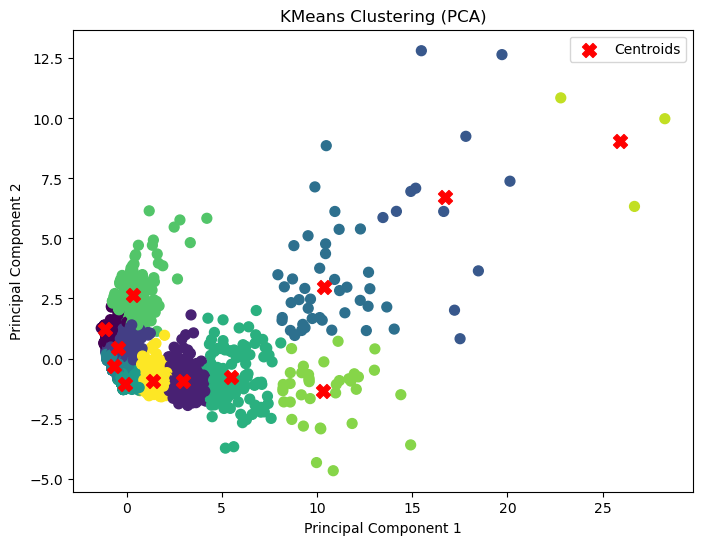

In [90]:
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_model.labels_, s=50, cmap='viridis')

# Plot centroids
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')

plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()